# Regression Model using Random Forest

In [68]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [69]:
df = pd.read_csv('HIV1-inhibitor_pIC50_pubchem_fp.csv')

## 1. Input and Output features

In [70]:
#input
x = df.drop('pIC50', axis = 1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7440,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7441,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7442,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#output
y = df['pIC50']
y

0       5.045757
1       5.853872
2       6.000000
3       5.769551
4       6.000000
          ...   
7439    5.408935
7440    5.677781
7441    4.823909
7442    5.154902
7443    5.004365
Name: pIC50, Length: 7444, dtype: float64

In [72]:
x.shape, y.shape

((7444, 881), (7444,))

## 2. Remove low variance features from input

In [73]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)

In [74]:
x.shape

(7444, 181)

## 3. Split data into training and test data (70/30 ratio)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)

In [76]:
x_train.shape, y_train.shape

((5210, 181), (5210,))

In [77]:
x_test.shape, y_test.shape

((2234, 181), (2234,))

## 4. Building a Regression Model using Random Forest

In [78]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.4037956810656925

In [80]:
y_pred = model.predict(x_test)

## 5. Scatter Plot of Experimental vs Predicted pIC50 Values

C:\Users\jeta7\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

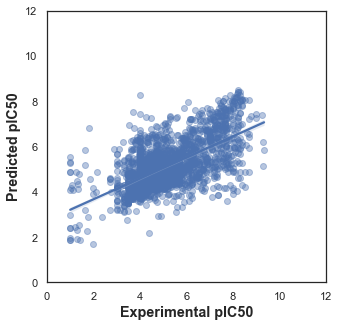

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show